Regresie Liniară
==============


* Tudor Berariu, Andrei Nica 2018

* Alexandru Sorici 2020

## 1. Scopul Laboratorului

Scopul laboratorului îl reprezintă înțelegerea algoritmului de **regresie liniară**, precum și a noțiunilor de _extragere de atribute (features)_ _complexitate a modelului_ și _regularizare_.

## 2. Problema de rezolvat

Problema de rezolvat în acest laborator este una de învățare supervizată, mai concret, de **regresie**. 

Fiind date eșantionări de puncte (samples) **(X, t)**, generate de o funcție necunoscută, se dorește construirea unui **model liniar** care să poată _potrivi_ setul de date **X** (să aproximeze funcția) și care să poată fi utilizat pentru a _evalua/prezice_ valori noi.

Vom explora trei aspecte ale problemei de **regresie liniara**:
* Regresie liniara simplă (potrivirea unei drepte)
* Regresie liniară folosind **extragere de atribute** (eng. feature extraction)
* **Regularizare**, **analiza complexității modelului de regresie** și **influența numărului de date de antrenare**

## 3. Regresie liniară simplă

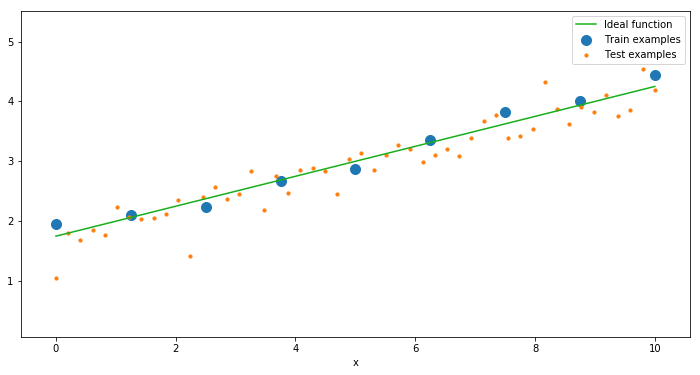

Se dă setul de date (**X**, **t**) constând dintr-o mulțime **X** de N puncte de dimensiune D (i.e. fiecare ${\bf x^{(i)}} \in {\bf X}$ este de forma ${\bf x} = (x_1, x_2, ..., x_D)$).
Pentru fiecare ${\bf x}^{(n)} \in X$ exista un $t^{(n)}$ reprezentand valoarea unei functii $f$ (necunoscute noua) in punctul ${\bf x}^{(n)}$, i.e. $t^{(n)} = f({\bf x}^{(n)})$.

Un model de regresie liniara simpla care doreste sa aproximeze functia $f$ este definit ca $${\bf y} = {\bf X} {\bf w} + b$$ unde ${\bf w}$ este un vector D-dimensional de ponderi, iar $b$ este termenul de bias.

In regresia liniara simpla se cauta solutia de **forma inchisa**:
$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf x^{(n)}} {\bf w} - t^{(n)}\right)^2$$
$${\bf w}^* = \left({\bf X}^\intercal {\bf X}\right)^{-1} {\bf X}^\intercal {\bf t} = {\bf X}^{\dagger} {\bf t}$$

unde ${\bf X^{\dagger}}$ este _pseudo inversa_ matricii ${\bf X}$.


## 4. Regresie liniara cu extragere de atribute

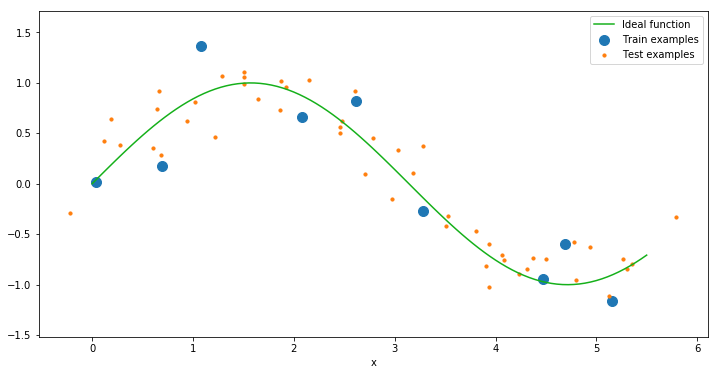

In unele cazuri, functia $f$ din care provine setul de date (**X, t**) nu este unul care sa poata fi aproximat printr-o simpla combinatie liniara a **spatiului de intrare** (i.e. a domeniului din care provine **X**).

Intr-un astfel de caz, spatiul de intrare poate fi _transformat_ intr-unul mai complex, avand o capabilitate de modelare mai bogata.
Acest lucru se face prin intermediul unor _functii de transformare_ $\phi$ care duc ${\bf x^{(n)}} \rightarrow \phi({\bf x^{(n)}})$.

Un exemplu il reprezinta functiile de **transformari polinomiale** de tipul:
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$
unde $M$ este gradul polinomului cu care se face transformarea.

Solutia de regresie liniara (in forma inchisa) devine atunci:


$${\bf w}^* = \underset{{\bf w}}{\arg\!\min} \sum_{n} \left({\bf \phi}^{(n)}{\bf w} - t^{(n)}\right)^2$$


$${\bf w}^* = \left({\bf \Phi}^\intercal {\bf \Phi}\right)^{-1} {\bf \Phi}^\intercal {\bf t} = {\bf \Phi}^{\dagger} {\bf t}$$

## 5. Regresie liniara cu regularizare

%TODO

### Dependente

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [4]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 6. Generare seturi de date

In [247]:
DATASET_TYPE = "linear" # linear, polinomial, sin

In [248]:
def generate_examples(dataset_type = "linear", N = 9, noise = 0.2, dist_noise = 0.2):
    if dataset_type == "linear":
        X = np.linspace(0, 10, N)
        t = X * 0.25 + 1.75 + np.random.randn(N) * noise
        return X, t
    
    elif dataset_type == "polinomial":
        X = np.linspace(-1.5, 5.5, N)
        X += np.random.randn(N) * dist_noise
        t = .25*X * X - X + 1 + np.random.randn(N) * noise
        return X, t
    
    elif dataset_type == "sin":
        X = np.linspace(0, 1.75 * np.pi, N)
        X += np.random.randn(N) * dist_noise
        t = np.sin(X) + np.random.randn(N) * noise
        return X, t
    
    else:
        raise ValueError("Unknown dataset type: " + dataset_type)

## 6. Cerinta 1: Implementare model de regresie liniara

In [22]:
class Regression(object):
    """
    Base class for regressors
    """
    pass

### 6.1 Cerinta 1.1: Implementarea modelului general de regresie liniara

In [23]:
class LinearRegression(Regression):
    """
    Modelul de Regresie Liniara
    y = X @ w 
        - valoarea prezisă de model
    t ~ N(t|X @ w, var) 
        - valorile de antrenare (target) sunt fac parte dintr-o distributie normala in jurul mean-ului X@w, 
          la care se adauga zgomot dat de varianta `var`
    """

    def fit(self, X, t):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting)
        Parameterii
        ----------
        X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """
        self.w = np.linalg.pinv(X) @ t
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Intoarce valoari prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezice, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

### 6.2 Cerinta 1.2 Implementarea functiei de transformare polinomiala
$$\phi_i(x) = x^i, \quad 0 \le i \le M$$

In [268]:
def extract_polynomial_features(X, M):
    N = X.size
    phi = np.ones((N, M + 1))
    for j in range(1, M+1):
        phi[:,j] = phi[:,j-1] * X
    return phi

#extract_polynomial_features(X_train, 9)

### 6.3 Cerinta 1.3 Potrivirea unei drepte prin regresie liniara simpla

In [279]:
N_train = 10
N_test = 10
noise = 0.22

X_train, t_train = generate_examples(dataset_type="linear", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="linear", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="linear", N=N_test, noise=0.)


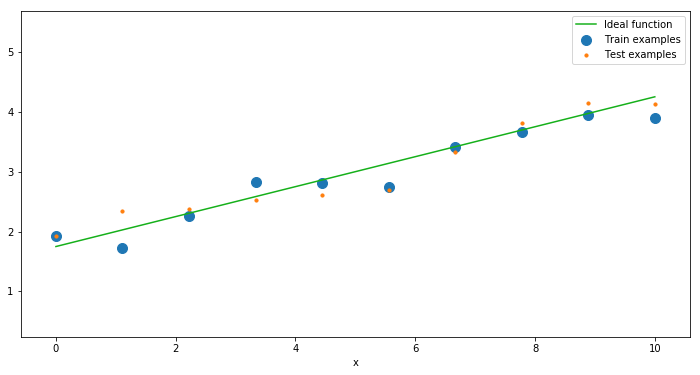

In [281]:
plt.figure(figsize=(12,6)); plt.axis('equal')
plt.plot(X_real, t_real, sns.xkcd_rgb["green"], label="Ideal function")
plt.scatter(X_train, t_train, s=100, label="Train examples")
plt.scatter(X_test, t_test, s=10, label="Test examples")
plt.xlabel("x")
plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)
plt.show()

In [275]:
model = LinearRegression()
X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

In [276]:
def mean_squared_error(y, t):
    return np.mean((y - t) * (y- t))

In [277]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

Train error: 0.017542083966542023
Test  error: 0.06494055612368387


#### Vizualizarea potrivirii

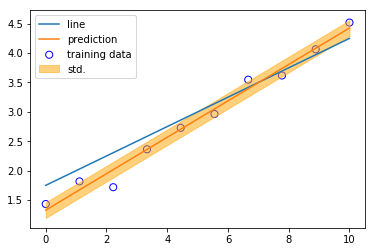

In [278]:
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="line")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 7. Cerinta 2.1: Implementare regresie liniara cu regularizare (Ridge Regression)

In [158]:
class RidgeRegression(Regression):
    """
    Modelul de regresie liniara, folosind regularizare L2
    w* = argmin |t - X @ w| + alpha * |w|_2^2
    """

    def __init__(self, alpha:float=1.):
        self.alpha = alpha

    def fit(self, X:np.ndarray, t:np.ndarray):
        """
        Antrenarea modelului in sensul celor mai mici patrate (least squares fitting), tinand cont si de regularizare
        Parameterii
        ----------
         X : (N, D) np.ndarray
            variabilele de intrare
        t : (N,) np.ndarray
            variabilele tinta (target / ground truth)
        """

        eye = np.eye(np.size(X, 1))
        self.w = np.linalg.solve(self.alpha * eye + X.T @ X, X.T @ t)
        self.var = np.mean(np.square(X @ self.w - t))

    def predict(self, X, return_std=False):
        """
        Intoarce valoari prezise de model pentru sample-uri X
        Parametrii
        ----------
        X : (N, D) np.ndarray
            sample-uri de valori D-dimensionale pentru care se doreste predictia valorii conform modelului
        return_std : bool, optional
            intoarce deviatia standard a fiecarei valori prezice, daca e setat pe True
        
        Intoarce
        -------
        y : (N,) np.ndarray
            vector de valori prezise
        y_std : (N,) np.ndarray
            deviatia standard a fiecarei valori prezise
        """
        y = X @ self.w
        if return_std:
            y_std = np.sqrt(self.var) + np.zeros_like(y)
            return y, y_std
        return y

## 7.1 Cerinta 2.2: Potrivirea functiei sin(x) cu feature-uri polinomiale

In [237]:
N_train = 10
N_test = 20
noise = 0.22

X_train, t_train = generate_examples(dataset_type="sin", N=N_train, noise=noise)
X_test, t_test = generate_examples(dataset_type="sin", N=N_test, noise=noise)
X_real, t_real = generate_examples(dataset_type="sin", N=100, noise=.0, dist_noise=.0)

### Folosirea unui model de regresie liniara, _fara_ regularizare

In [238]:
M = 4
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)

model = LinearRegression()
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

#### Visualise learned predictor

Train error: 0.029962383260526256
Test  error: 0.2203521725863174


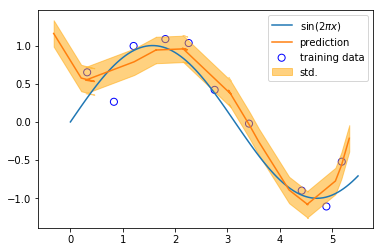

In [239]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

### Folosirea unui model de regresie liniara, _cu_ regularizare

In [240]:
model = RidgeRegression(alpha=1.75)
model.fit(X_train_feat, t_train)

y_train = model.predict(X_train_feat, return_std=False) 
y_test, y_test_std = model.predict(X_test_feat, return_std=True)

Train error: 0.04949830206822682
Test  error: 0.09186593345802772


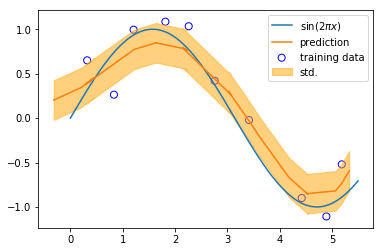

In [241]:
print("Train error:", mean_squared_error(y_train, t_train))
print("Test  error:", mean_squared_error(y_test, t_test))

# Plot
plt.scatter(X_train, t_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(X_real, t_real, label="$\sin(2\pi x)$")
plt.plot(X_test, y_test, label="prediction")
plt.fill_between(
    X_test, y_test - y_test_std, y_test + y_test_std,
    color="orange", alpha=0.5, label="std.")
plt.legend()
plt.show()

## 8. Vizualizarea curbelor de antrenare si testare

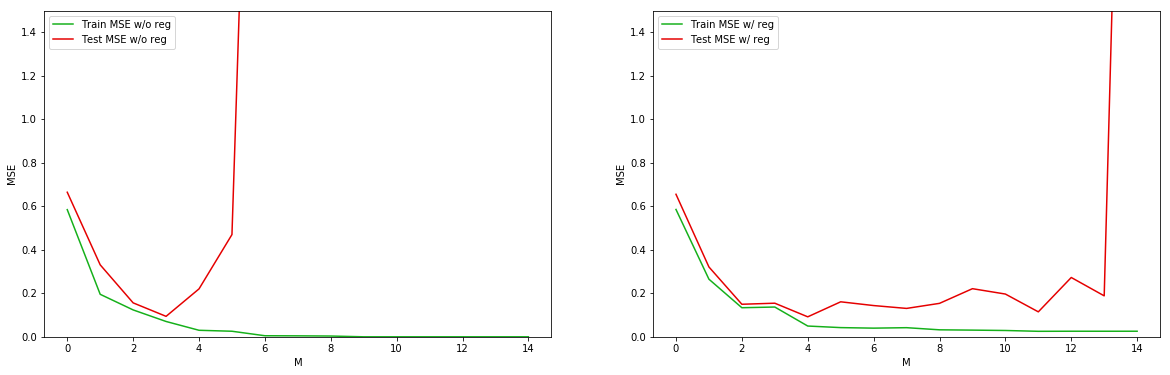

In [242]:
train_lin_mse = []
test_lin_mse = []

train_ridge_mse = []
test_ridge_mse = []

for M in range(15):
    X_train_feat = extract_polynomial_features(X_train, M)
    X_test_feat = extract_polynomial_features(X_test, M)
    
    model_linear = LinearRegression()
    model_ridge = RidgeRegression(alpha=1.75)
    
    model_linear.fit(X_train_feat, t_train)
    model_ridge.fit(X_train_feat, t_train)
    
    y_train_lin = model_linear.predict(X_train_feat)
    y_test_lin = model_linear.predict(X_test_feat)
    
    y_train_ridge = model_ridge.predict(X_train_feat)
    y_test_ridge = model_ridge.predict(X_test_feat)
    
    train_lin_mse.append(mean_squared_error(y_train_lin, t_train))
    test_lin_mse.append(mean_squared_error(y_test_lin, t_test))
    
    train_ridge_mse.append(mean_squared_error(y_train_ridge, t_train))
    test_ridge_mse.append(mean_squared_error(y_test_ridge, t_test))

plt.figure(figsize=(20,6))
# plot training/test curves depending on model size for LinearRegression
plt.subplot(1, 2, 1)
plt.plot(range(M+1), train_lin_mse, sns.xkcd_rgb["green"], label="Train MSE w/o reg")
plt.plot(range(M+1), test_lin_mse, sns.xkcd_rgb["red"], label="Test MSE w/o reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

# plot training/test curves depending on model size for RidgeRegression
plt.subplot(1, 2, 2)
plt.plot(range(M+1), train_ridge_mse, sns.xkcd_rgb["green"], label="Train MSE w/ reg")
plt.plot(range(M+1), test_ridge_mse, sns.xkcd_rgb["red"], label="Test MSE w/ reg")
plt.xlabel("M")
plt.ylabel("MSE")
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylim(0, 1.5)

plt.show()